In [1]:
import pandas as pd
import gzip
import numpy as np

Below I have extracted columns, pos and entire data for OLD VCF named: testing_grOLD_ref1_golden.vcf.gz

In [2]:
old_file_columns = []
old_file_data = []
old_pos = []
with gzip.open(r'testing_grOLD_ref1_golden.vcf.gz', "rt") as ifile:
    for line in ifile:
        if line.startswith("#CHROM"):
            old_file_columns.append(line.split('\t'))
            print(old_file_columns)
        if not line.startswith('##'):
            old_file_data.append(line.strip().split('\t'))
            old_pos.append((line.strip().split('\t')[1]))
    
ifile.close()

In [5]:
old_file_data[:5]

[['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO'],
 ['chr1', '10855', '.', 'C', 'G', '.', 'PASS', 'WP=1/0'],
 ['chr1', '11623', '.', 'C', 'T', '.', 'PASS', 'WP=0/1'],
 ['chr1', '12486', '.', 'C', 'T', '.', 'PASS', 'WP=1/0'],
 ['chr1', '12590', '.', 'C', 'T', '.', 'PASS', 'WP=1/0']]

Similarly, in the below I extracted columns, pos and entire data for NEW VCF named: testing_gr_new-r4_golden.vcf.gz </br>
This is the new vcf that you sent on slack which HAS DELETIONS

In [8]:
columns = []
data = []
pos = []

with gzip.open(r'testing_gr_new-r4_golden.vcf.gz', "rt") as ifile:
    for line in ifile:
        if line.startswith("#CHROM"):
            columns.append(line.strip().split('\t'))
#             print(columns)
        if not line.startswith('##') and not line.startswith('#') and len(line.strip().split('\t')) > 9:
            data.append(line.strip().split('\t'))
#             if len(line.strip().split('\t')) > 9:
#                 print(line.strip().split('\t'))
            pos.append(int(line.strip().split('\t')[1]))
    
ifile.close()

In [9]:
data[:5]

[['chr1', '10612', '.', 'A', 'C', '36', 'PASS', '.', 'GT', '0/1'],
 ['chr1', '11185', '.', 'G', 'T', '36', 'PASS', '.', 'GT', '1/0'],
 ['chr1', '12949', '.', 'G', 'C', '36', 'PASS', '.', 'GT', '1/0'],
 ['chr1', '13087', '.', 'A', 'T', '36', 'PASS', '.', 'GT', '0/1'],
 ['chr1', '15663', '.', 'G', 'A', '36', 'PASS', '.', 'GT', '1/0']]

In [10]:
columns

[['#CHROM',
  'POS',
  'ID',
  'REF',
  'ALT',
  'QUAL',
  'FILTER',
  'INFO',
  'FORMAT',
  'NEAT_simulated_sample']]

In [11]:
old_df = pd.DataFrame (old_file_data)
old_df.columns = old_df.iloc[0]
old_df = old_df[1:]
old_df

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO
1,chr1,10855,.,C,G,.,PASS,WP=1/0
2,chr1,11623,.,C,T,.,PASS,WP=0/1
3,chr1,12486,.,C,T,.,PASS,WP=1/0
4,chr1,12590,.,C,T,.,PASS,WP=1/0
5,chr1,12884,.,T,G,.,PASS,WP=0/1
...,...,...,...,...,...,...,...,...
228556,chr1,249239093,.,G,GTCATG,.,PASS,WP=1/0
228557,chr1,249239526,.,C,T,.,PASS,WP=0/1
228558,chr1,249239694,.,A,G,.,PASS,WP=1/0
228559,chr1,249240397,.,G,A,.,PASS,WP=0/1


In [12]:
new_df = pd.DataFrame(data, columns = columns)
new_df

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NEAT_simulated_sample
0,chr1,10612,.,A,C,36,PASS,.,GT,0/1
1,chr1,11185,.,G,T,36,PASS,.,GT,1/0
2,chr1,12949,.,G,C,36,PASS,.,GT,1/0
3,chr1,13087,.,A,T,36,PASS,.,GT,0/1
4,chr1,15663,.,G,A,36,PASS,.,GT,1/0
...,...,...,...,...,...,...,...,...,...,...
249038,chr1,249236886,.,A,G,36,PASS,.,GT,0/1
249039,chr1,249237025,.,T,G,36,PASS,.,GT,0/1
249040,chr1,249239098,.,C,A,36,PASS,.,GT,0/1
249041,chr1,249239201,.,C,G,36,PASS,.,GT,0/1


# Insertion and Deletion

1. old file

In [15]:
snp = 0
insertion = 0
deletion = 0
for i in range(len(old_df)):
        if len(old_df.iloc[i][3]) == 1 and len(old_df.iloc[i][4]) == 1:
            snp += 1
        elif len(old_df.iloc[i][4]) > len(old_df.iloc[i][3]):
            insertion += 1
        elif len(old_df.iloc[i][4]) < len(old_df.iloc[i][3]):
            deletion += 1
#             print(old_df.iloc[i][3], old_df.iloc[i][4])

snp_old = snp/len(old_df)
print("Snp for old file:" +str(snp_old))

Snp for old file:0.9508356667833392


In [16]:
snp, insertion, deletion

(217323, 6810, 4427)

2. new file

In [17]:
snp_new = 0
indel_new = 0
ins = 0
d = 0

for i in range(len(new_df)):
    if len(new_df.iloc[i][3]) == 1 and len(new_df.iloc[i][4]) == 1:
        snp_new += 1
    elif len(new_df.iloc[i][4]) > len(new_df.iloc[i][3]):
        ins += 1
    elif len(new_df.iloc[i][4]) < len(new_df.iloc[i][3]):
        d += 1
    if len(new_df.iloc[i][4]) > 1 or len(new_df.iloc[i][3]) > 1:
        indel_new += 1

snp_new_value = snp_new/len(new_df)
indel_new_value = indel_new/len(new_df)

print("Snp for new file:" +str(snp_new_value))
print("Indel for new file:" +str(indel_new_value))

Snp for new file:0.9497636954260911
Indel for new file:0.05023630457390892


In [11]:
snp_new, ins, d

(236532, 7372, 5139)

In [18]:
data = {'Category':  ['snp', 'insertions', 'deletions', 'total'],
        'old': [217323, 6810, 4427, 217323+6810+4427] , 'new' : [236532, 7372, 5139, 236532+7372+5139],
        }
table = pd.DataFrame(data)
table

,Category,old,new
0,snp,217323,236532
1,insertions,6810,7372
2,deletions,4427,5139
3,total,228560,249043


# Mutation Rate for both VCF files

In [68]:
def mutation_rate(dataframe):
    rate = 0
    for i in range(len(dataframe)):
        variant_length = max(len(dataframe.iloc[i][3]), len(dataframe.iloc[i][4]))
        rate += variant_length/249250621
    return rate

print("Mutation rate for Old VCF: "+str(mutation_rate(old_df)))
print("Mutation rate for New VCF: "+str(mutation_rate(new_df)))

Mutation rate for Old VCF: 0.0010467255766649088
Mutation rate for New VCF: 0.0011467855079079121


# plots #

In [25]:
old_pos = [int(i) for i in old_pos[1:]]
old_pos[:10]

[11623, 12486, 12590, 12884, 15043, 15109, 16288, 16359, 17334, 17786]

In [26]:
old_np_array = np.array(old_pos)
old_np_array

array([    11623,     12486,     12590, ..., 249239694, 249240397,
       249240568])

In [29]:
new_np_array = np.array(pos)
old_np_array, new_np_array

(array([    11623,     12486,     12590, ..., 249239694, 249240397,
        249240568]),
 array([    10612,     11185,     12949, ..., 249239098, 249239201,
        249239916]))

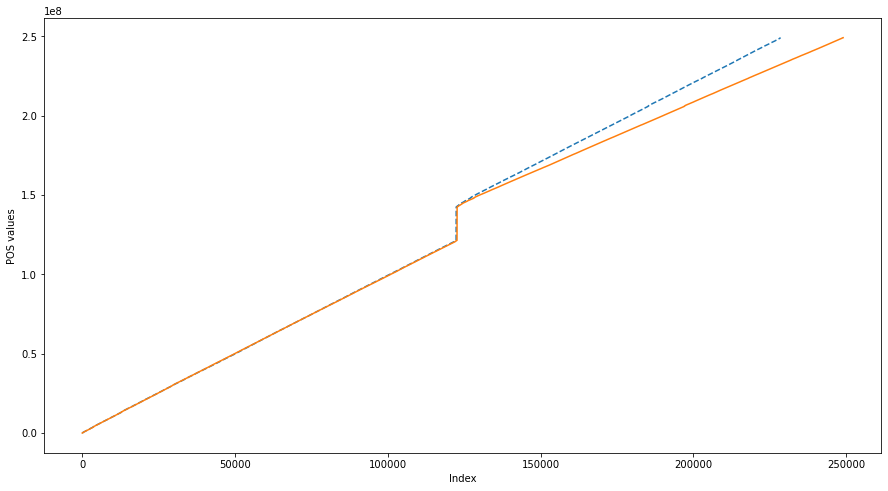

In [37]:
from shapely.geometry import LineString
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,8)
plt.xlabel('Index')
plt.ylabel('POS values')
plt.plot(old_np_array, '--', label='Old file')
plt.plot(new_np_array, label= 'New file')

In [ ]:
find max(old) # 200000
reference[max_old:max_new] # find % N
count up number of N in reference / number of bases in that region

In [39]:
old_np_array

array([    11623,     12486,     12590, ..., 249239694, 249240397,
       249240568])

In [45]:
old_difference = []
for i in range(1, len(old_np_array)):
    old_difference.append(old_np_array[i] - old_np_array[i - 1])    
    
old_difference = np.array(old_difference)

x_old = [i for i in range(1, len(old_np_array))]
print(len(old_difference), len(x_old))

228558 228558


In [46]:
new_np_array

array([    10612,     11185,     12949, ..., 249239098, 249239201,
       249239916])

In [49]:
new_difference = []
for i in range(1, len(new_np_array)):
    new_difference.append(new_np_array[i] - new_np_array[i - 1])
new_difference = np.array(new_difference)
x_new = [i for i in range(1, len(new_np_array))]
print(new_difference)


[ 573 1764  138 ... 2073  103  715]
249042 249042


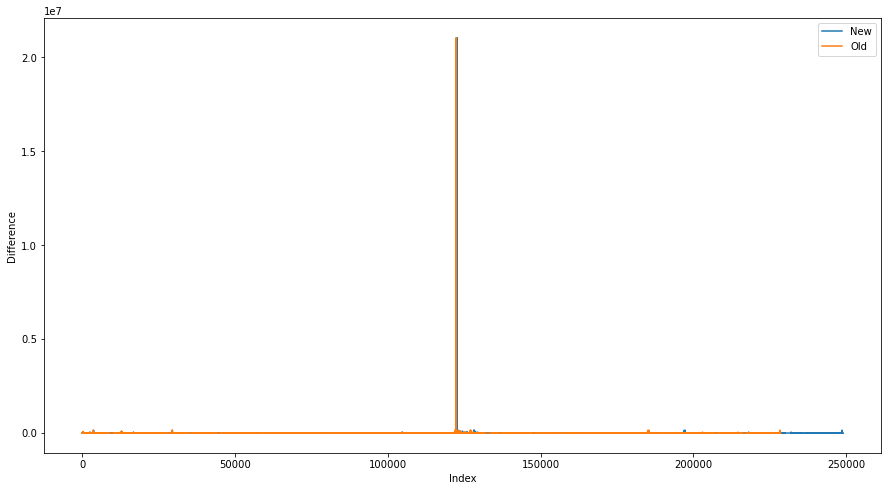

In [50]:
plt.ylabel("Difference")
plt.xlabel("Index")
plt.plot(x_new, new_difference)
plt.plot(x_old, old_difference)
plt.legend(["New", "Old"])

In [54]:
x1 = [i for i in range(0, len(new_difference))]

x2 = [i for i in range(0, len(old_difference))]
len(x1), len(x2)

(249042, 228558)

In [55]:
def plot_graph(start, end):
    plt.ylabel("Difference")
    plt.xlabel("Index")
    start = int(start)
    end = int(end)
    plt.plot(x1[start:end], new_difference[start:end])
    plt.plot(x2[start:end], old_difference[start:end])
    plt.legend(["New", "Old"])   

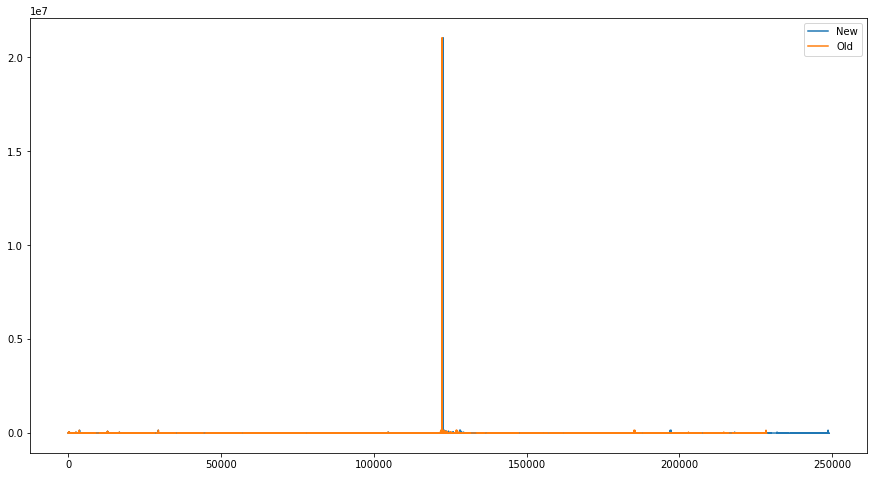

In [56]:
plt.plot(x1, new_difference)
plt.plot(x2, old_difference)
plt.legend(["New", "Old"])

Give min and max values to plot_graph function

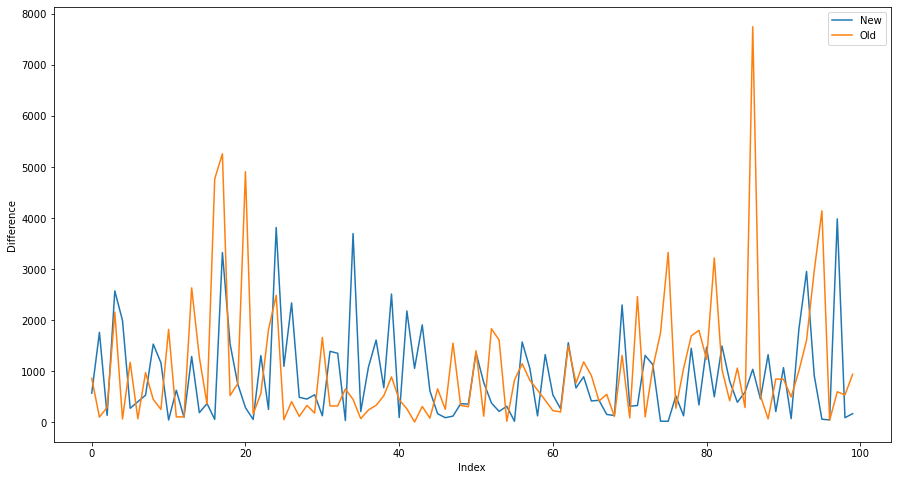

In [59]:
plot_graph(0, 100)

In [62]:
new_difference_without_max_value = np.delete(new_difference, np.where(new_difference == max(new_difference)))
old_difference_without_max_value = np.delete(old_difference, np.where(old_difference == max(old_difference)))

len(new_difference_without_max_value), len(old_difference_without_max_value)

(249041, 228557)

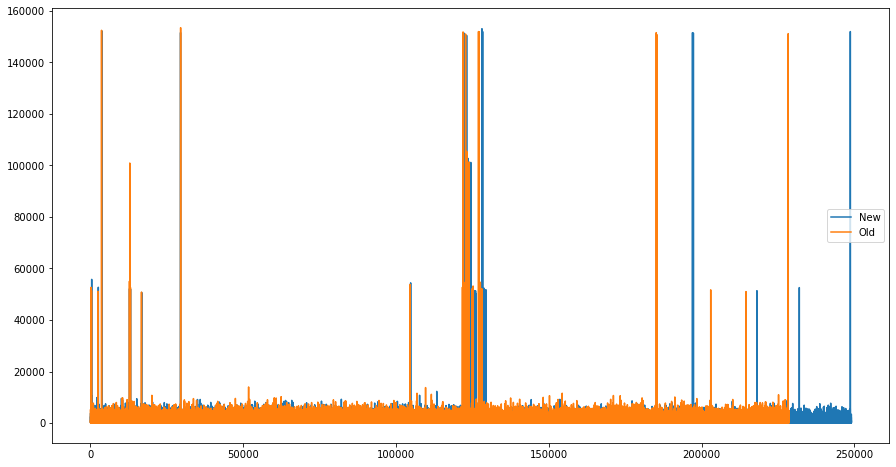

In [66]:
plt.plot([i for i in range(0, len(new_difference_without_max_value))], new_difference_without_max_value)
plt.plot([i for i in range(0, len(old_difference_without_max_value))], old_difference_without_max_value)
plt.legend(["New", "Old"])

# statistics #

In [31]:
def statistics(np_array):
    print("Mean: "+str(np.mean(np_array)))
    print("Std Deviation: "+str(np.std(np_array)))
    print("Lowest value: "+str(np.min(np_array)))
    print("Highest value: "+str(np.max(np_array)))

In [34]:
print("Stats for old VCF: ")
statistics(old_np_array)
print("\nStats for old VCF: ")
statistics(new_np_array)

Stats for old VCF: 
Mean: 123951553.90159653
Std Deviation: 75091352.91097116
Lowest value: 11623
Highest value: 249240568

Stats for old VCF: 
Mean: 129902151.88788684
Std Deviation: 75231637.73205373
Lowest value: 10612
Highest value: 249239916
